## Ocean data exploration

In [1]:
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload module is not an IPython extension.


UsageError: Line magic function `%autoreload` not found.


#### Import libraries

In [2]:
from jupyterthemes import jtplot
from src.plot_settings import ps_defaults
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
ps_defaults(use_tex=False, dpi=150)

In [3]:
import os
import xarray as xr
from src.constants import OCEAN_DATA_PATH, OCEAN_PATH, OCEAN_OUTPUT_PATH
import matplotlib.pyplot as plt
xr.set_options(display_style='text')

In [4]:
qflx_old = xr.open_dataarray(OCEAN_DATA_PATH / "qflx.nc", decode_times=False)

### Impliment ingrid

In [40]:
sst_qflx = xr.open_dataset(
    OCEAN_OUTPUT_PATH / "om_diag.nc", decode_times=False
).SST_QFLX.rename({"L_01": "Z", "T_01": "T", "X_01": "X", "Y_01": "Y"})
lent = len(sst_qflx.coords["T"])
sst_qflx_subset = sst_qflx.isel(T=slice(lent - 12, lent + 1)).rename("qflx")
sst_qflx_subset.coords["T"] = np.array([x + 0.5 for x in range(12)], dtype="float32")
sst_qflx_subset = (
    sst_qflx_subset.interp(
        Y=np.array(list(range(-90, 91)), dtype="float32"),
        X=np.array(list(range(0, 360)), dtype="float32"),
        kwargs={"fill_value": 0.0},
        method="linear",
    )
    .fillna(0.0)
    .coarsen()
    .mean()
    .astype("float32")
    .rename("qflx")
)
sst_qflx_subset.attrs = {
    "units": "unitless",
    "file_missing_value": -987654.0,
    "long_name": "qflx",
    "longname": "qflx",
}
sst_qflx_subset.coords["T"].attrs = {
    "modulus": 12.0,
    "modulo": 12.0,
    "pointwidth": 1.0,
    "calendar": "360",
    "gridtype": 1,
    "units": "months since 1960-01-01",
}
sst_qflx_subset.coords["Z"].attrs = {
    "long_name": "Level",
    "gridtype": 0,
    "units": "level",
}
sst_qflx_subset.coords["Y"].attrs = {
    "uniquename": "Y",
    "pointwidth": 1.0,
    "gridtype": 0,
    "units": "degree_north",
}
sst_qflx_subset.coords["X"].attrs = {
    "modulus": 360.0,
    "uniquename": "X",
    "pointwidth": 1.0,
    "gridtype": 1,
    "units": "degree_east",
}
output_ds = sst_qflx_subset.to_dataset()
output_ds.to_netcdf(OCEAN_DATA_PATH / "qflx-3.nc")
print(output_ds)

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


In [38]:
output_ds = sst_qflx_subset.to_dataset()

In [39]:
output_ds

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [166]:
print('new', sst_qflx_subset, '\n\nold', qflx_old)

new <xarray.DataArray 'qflx' (T: 12, Z: 1, Y: 181, X: 360)>
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
...
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


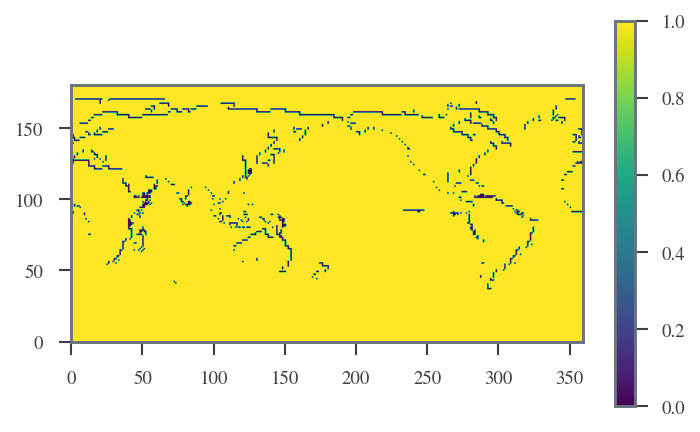

In [9]:
plt.imshow(np.isclose(sst_qflx_subset.isel(T=5, Z=0).values, qflx_old.isel(T=5, Z=0).values, atol=1e-05, equal_nan=True), origin='lower')
plt.colorbar()

In [10]:
np.all(sst_qflx_subset.isel(T=5).values.ravel() == qflx_old.isel(T=5).values.ravel())

False

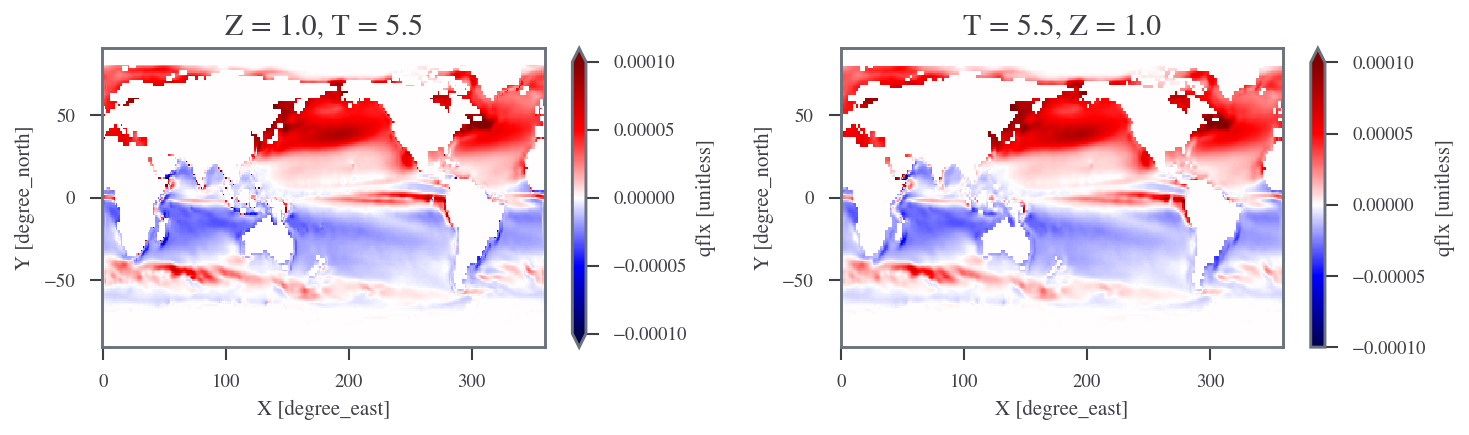

In [18]:
fig, (ax1, ax2) =plt.subplots(1, 2, figsize=(10, 3))
sst_qflx_subset.isel(T=5).plot(ax=ax1, vmin=-1e-4, vmax=1e-4, cmap='seismic')
qflx_old.isel(T=5).plot(ax=ax2, vmin=-1e-4, vmax=1e-4, cmap='seismic')
plt.tight_layout()

In [17]:
sst_qflx_subset.coords["X"].attrs

{'modulus': 360.0,
 'uniquename': 'X',
 'pointwidth': 1.0,
 'gridtype': 1,
 'units': 'degree_east'}

In [22]:
qflx_old['T'].encoding

{'source': '/home/users/sithom/seager19/ocean/DATA/qflx.nc',
 'original_shape': (12,),
 'dtype': dtype('float32')}

In [48]:
output_ds

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [82]:
output_ds.to_netcdf(OCEAN_DATA_PATH / "ipynb-test3.nc", format="NETCDF3_CLASSIC")

In [68]:
old_ds = xr.open_dataset(OCEAN_DATA_PATH / "qflx.nc", decode_times=False)

In [83]:
new_ds = xr.open_dataset(OCEAN_DATA_PATH / "ipynb-test3.nc", decode_times=False)

In [84]:
new_ds

<xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 ...

In [53]:
import recursive_diff

In [86]:
for x in recursive_diff.recursive_diff(old_ds, new_ds,  abs_tol=1e-2):
    print(x)
    print('ok')

In [66]:
output_ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    qflx     (T, Z, Y, X) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

In [67]:
old_ds.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:  (T: 12, X: 360, Y: 181, Z: 1)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Z        (Z) float32 1.0
  * T        (T) float32 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
Data variables:
    qflx     (T, Z, Y, X) float32 ...>

```
\begin{ingrid}

(DATA/qflx-0.nc)readCDF .X /XM exch def
(DATA/qflx-0.nc)readCDF .Y /YM exch def

(output/om_diag.nc)readCDF .SST_QFLX
T last 11 sub last RANGE 
T /T (months since 1960-01-01) periodic 0.5 1 11.5 NewEvenGRID replaceGRID
/X X periodic setgridtype def
Y -91 1 91 evengridAverage
0 replaceNaN
L /Z renameGRID
(qflx)rn
(DATA/qflx.nc)writeCDF
\end{ingrid}
```